# Notebook 2 - Crear y consultar una Base de Datos Relacional con MySQL

## Ejercicio 1

<b>Requisito:</b>
- Descargar el archivo <a href="./sakila-db.zip">sakila-db.zip</a>

<b>Problema: Un poco de retro-ingeniería...</b>

Tienen a su disposición el archivo sakila-db.zip, lo cual contiene dos archivos:
- 'sakila-schema.sql' : una serie de instrucciones en lenguaje SQL para crear una Base de Datos llamada 'sakila'
- 'sakila-data.sql' : una serie de instrucciones en SQL para insertar datos en la Base de Datos

A partir de estos archivos, el ejercicio consiste en deducir el Modelo Lógico de Datos (Modelo Relacional) y el Modelo Conceptual de Datos (Modelo Entidad-Asociación).

- MLD: <b>por completar</b>

- MCD: <b>por completar</b>

- ¿De qué podría servir esta base de datos? ¿Cuál era su aplicación probable? ¿Cuál sería una adaptación posible más moderna? 
<b>por responder</b>

Modelo Relacional:

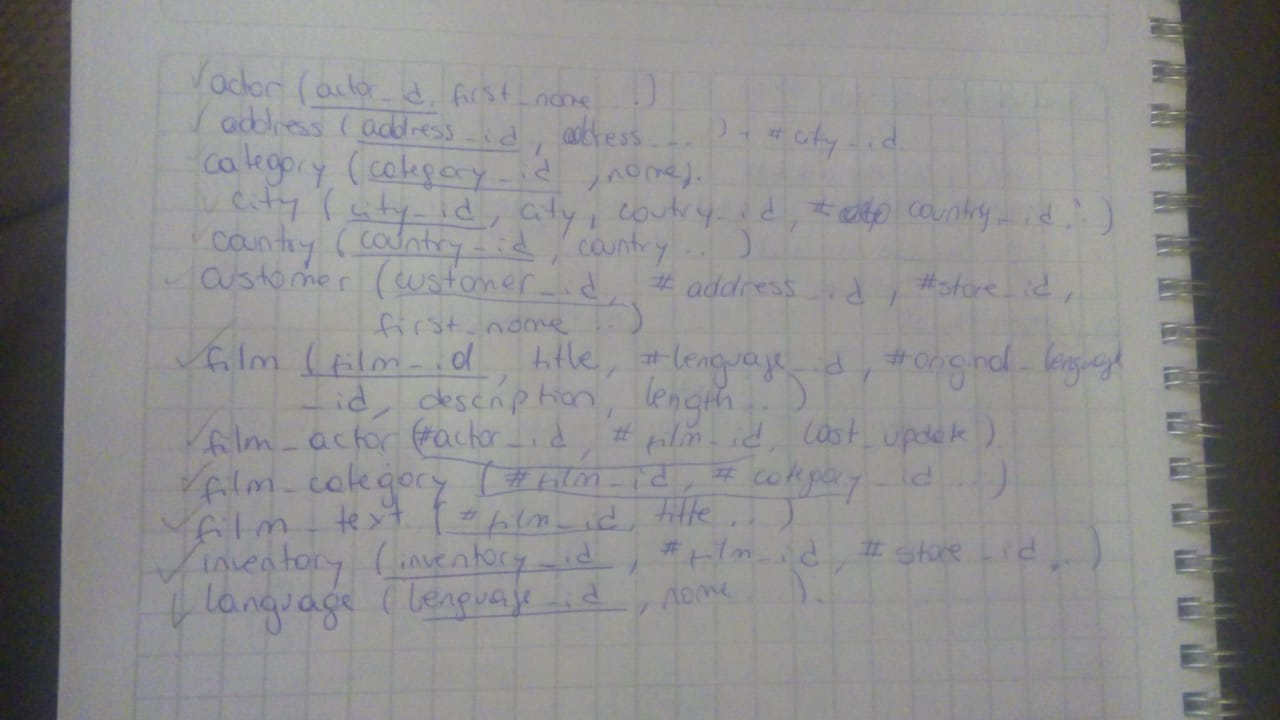

Modelo Entidad-Asociacion:

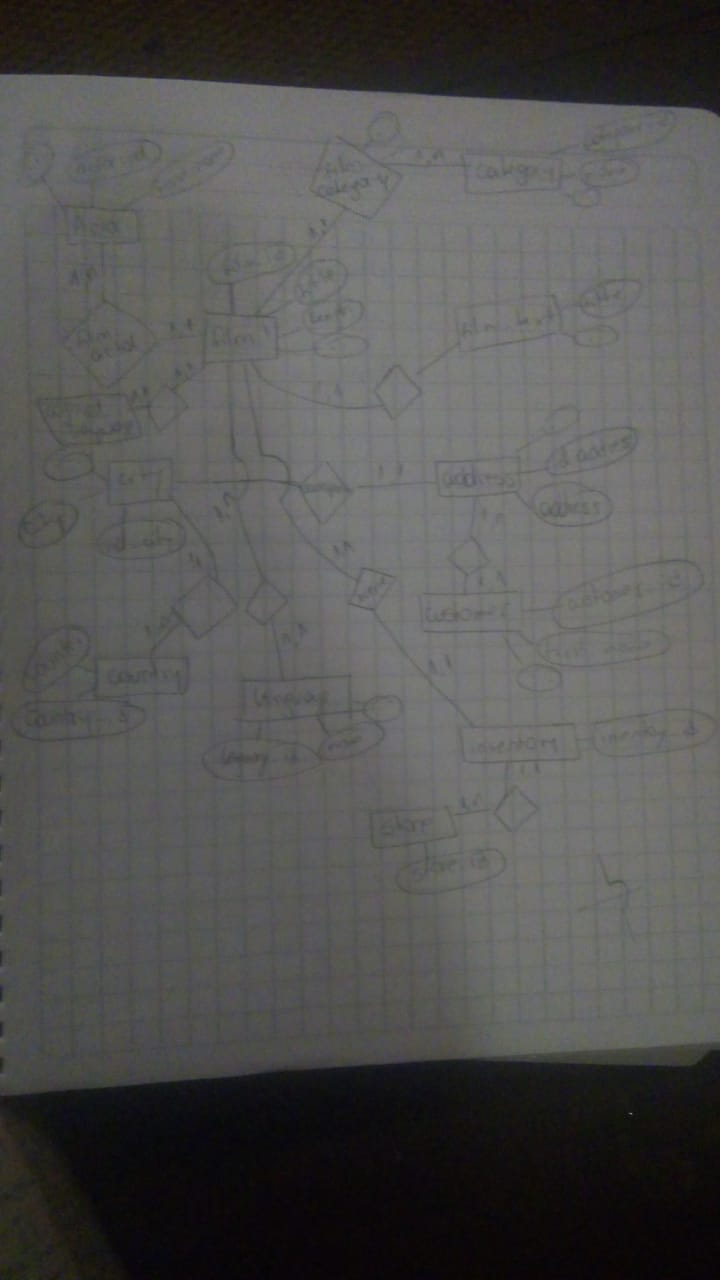

## Ejercicio 2

<b>Requisito:</b>
- Haber terminado el ejercicio 2

<b>Problema: ¿Cómo importar una base de datos?</b>

Queremos cargar la base de datos 'sakila' a partir de los 2 archivos .sql a nuestra disposición. ¿Cómo podemos hacer?

<b>Ayuda:</b> Revisar la página de documentación de MySQL que explica cómo ejecutar instrucciones SQL desde un archivo https://dev.mysql.com/doc/refman/8.0/en/mysql-batch-commands.html

In [ ]:
#Primero debemos cargar la base de datos en el terminal con el comando:

#source sakila-schema.sql

#Luego cargamos los datos, con el comando:

#source sakila-data.sql



## Ejercicio 3

<b>Requisito:</b>
- Haber terminado el ejercicio 3 y haber importado los datos en su MySQL local.

<b>Problema: Realizar consultas <code>SELECT</code> simple</b>

Desde un entorno Python (o MySQL CLI o MySQL Workbench), realizar los comandos SQL que permiten responder a las consultas siguientes. (No olviden utilizar el comando SQL <code>USE [database-name]</code> ;-))

<b> Ayuda: http://www.mysqltutorial.org/basic-mysql-tutorial.aspx</b>

In [1]:
import mysql.connector
import pandas as pd
from IPython.display import display,HTML

#reemplazar 'root' por el password del usuario administrador de MySQL
db_connection = mysql.connector.connect(user="root",host="localhost",password="root")
cursor = db_connection.cursor()
cursor.execute("USE sakila")

#Esta parte no fue comprendida, lo que esta aquí es lo que ustede realizó, además todas las actividades siguiente fueron 
#realizadas desde el terminal con mysql, ya que no e logrado entender del todo jupyter, asi que luego de lo que usted 
#hizo, se contestará con el comando realizado en el terminal.

1) A partir de la tabla "film", mostrar solamente cuáles son los títulos de pelicula disponibles.

In [4]:
df = pd.read_sql('SELECT title FROM film LIMIT 10;', con=db_connection)
display(df)


#SELECT title FROM film LIMIT 10;
#en esta instrucción, con SELECT se pide una lista de "title", con FROM indicamos que está ubicada en la tabla "film", 
#acotando a que sea una lista como limite de 10 filas.

,title
0,ACADEMY DINOSAUR
1,ACE GOLDFINGER
2,ADAPTATION HOLES
3,AFFAIR PREJUDICE
4,AFRICAN EGG
5,AGENT TRUMAN
6,AIRPLANE SIERRA
7,AIRPORT POLLOCK
8,ALABAMA DEVIL
9,ALADDIN CALENDAR


2) A partir de la tabla "film", mostrar de qué años son las peliculas disponibles. NB: utilizar la instrucción <code>DISTINCT</code>


In [5]:
df = pd.read_sql('SELECT DISTINCT release_year FROM film LIMIT 10;', con=db_connection)
display(df)

#SELECT DISTINCT release_year FROM film LIMIT 10;
#esta instrucción al igual que la anterior pide una lista de años en la tabla film, con un limite de 10 de largo. Pero aqui
#se agrega la instrucción DISTRINCT que nos ayuda eliminar filas repetidas en nuestro listado

,release_year
0,2006


3) Mostrar los títulos de pelicula en la tabla "film" que se puede arrendar por más de 4 días (rental_duration)

In [7]:
df = pd.read_sql('SELECT title, rental_duration '
                 + 'FROM film '
                 + 'WHERE rental_duration>=4 LIMIT 10;', con=db_connection)
display(df)

#SELECT title rental_duration FROM film WHERE rental_duration>=4 LIMIT 10;
#al igual que en las preguntas utilizamos SELECT para seleccionar una lista, en este caso de titulos y de duración de renta
#en la tabla film, pero agregamos el comando WHERE que nos ayuda acotar una la lista de rental_duration en este caso a 
#los menores o iguales a 4, y limitamos la lista a 10 filas.

,title,rental_duration
0,ACADEMY DINOSAUR,6
1,ADAPTATION HOLES,7
2,AFFAIR PREJUDICE,5
3,AFRICAN EGG,6
4,AIRPLANE SIERRA,6
5,AIRPORT POLLOCK,6
6,ALADDIN CALENDAR,6
7,ALAMO VIDEOTAPE,6
8,ALASKA PHANTOM,6
9,ALI FOREVER,4


4) En la tabla "payment", mostrar el customer_id, rental_id, amount y payment_date de todos los arriendos realizados entre las fechas 2005-07-01 y 2005-08-01

In [9]:
df = pd.read_sql('SELECT customer_id, rental_id, amount, payment_date '
        + 'FROM payment '
        + 'WHERE payment_date BETWEEN \"2005-07-01\" AND \"2005-08-01\" LIMIT 10;', con=db_connection)
display(df)

#SELECT customer_id, rental_id, amount, payment_date  FROM payment  WHERE payment_date BETWEEN '2005-07-0' AND 
#'2005-08-01' LIMIT 10;
# utilizando la misma idea de los ejercicios anteriores para SELECT, FROM y WHERE, aqui agreamos una nueva instrucción
# que es BETWEEN que nos ayuda a acotar por intervalos en este caso es de tiempo para la lista payment_date

,customer_id,rental_id,amount,payment_date
0,1,4526,5.99,2005-07-08 03:17:05
1,1,4611,5.99,2005-07-08 07:33:56
2,1,5244,4.99,2005-07-09 13:24:07
3,1,5326,4.99,2005-07-09 16:38:01
4,1,6163,7.99,2005-07-11 10:13:46
5,1,7273,2.99,2005-07-27 11:31:22
6,1,7841,4.99,2005-07-28 09:04:45
7,1,8033,4.99,2005-07-28 16:18:23
8,1,8074,0.99,2005-07-28 17:33:39
9,1,8116,0.99,2005-07-28 19:20:07


## Ejercicio 4

<b>Requisito:</b>
- Haber terminado el ejercicio 4

<b>Problema: Realizar consultas <code>SELECT</code> con funciones de agregación </b>

Desde un entorno Python (o MySQL CLI o MySQL Workbench), realizar los comandos SQL que permiten responder a las consultas siguientes.

<b> Ayuda: http://www.mysqltutorial.org/basic-mysql-tutorial.aspx</b>


1) Contar el número de clientes en la tabla "CUSTOMER"

2) En la tabla "RENTAL", contar cuánto arriendos se realizó por cada cliente (NB: utilizar la instucción <code>GROUP BY</code> y <code>COUNT</code>)

3) ¿Qué devuelve la consulta SQL siguiente?

<code>SELECT MAX(total) FROM (SELECT customer_id,count(*) as total FROM rental GROUP BY customer_id) as t1;</code>

4) ¿Qué es un sub-consulta?

5) En la tabla "payment", mostrar el volumen de negocio realizado por cada miembro del staff (staff_id) en total.

6) En una consulta, mostrar el staff_id que ha realizado más volumen de negocio el dia 2005-08-23.

1) SELECT MAX(total) FROM (SELECT customer_id, count(*) as total FROM rental GROUP BY customer_id) as t1;

## Ejercicio 5

<b>Requisito:</b>
- Haber terminado el ejercicio 4

<b>Problema: Realizar consultas <code>SELECT</code> con operaciones de JOIN </b>

Desde un entorno Python (o MySQL CLI o MySQL Workbench), realizar los comandos SQL que permiten responder a las consultas siguientes.

<b> Ayuda: http://www.mysqltutorial.org/basic-mysql-tutorial.aspx</b>


1) En las peliculas "Film" y "Language", mostrar el título de la pelicula y el nombre de su idioma. (NB: utilizar una operación de INNER JOIN)

2) Mostrar los nombres y apellidos de los clientes que han arrendado la pelicula "CHICAGO NORTH"

3) Mostrar por cada nombres y apellidos de cliente, en qué ciudad viven (tabla Customer y City)

4) Mostrar cuántas veces fueron arrendadas las peliculas (mostrando el título de la pelicula)

5) Mostrar qué pelicula generó más volumen de negocio

6) Mostrar los clientes que arrendarón por más de 10 dolares de pelicula.